## Prac W6 Performance contd. and Loss Functions

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Q1

In [6]:
# Load data
train_data = pd.read_csv('ann-train.data', delim_whitespace=True, header=None)
test_data = pd.read_csv('ann-test.data', delim_whitespace=True, header=None)

# Split into features and labels
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

C:\Users\sasha\AppData\Local\Temp\ipykernel_18676\3069406805.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('ann-train.data', delim_whitespace=True, header=None)
C:\Users\sasha\AppData\Local\Temp\ipykernel_18676\3069406805.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv('ann-test.data', delim_whitespace=True, header=None)


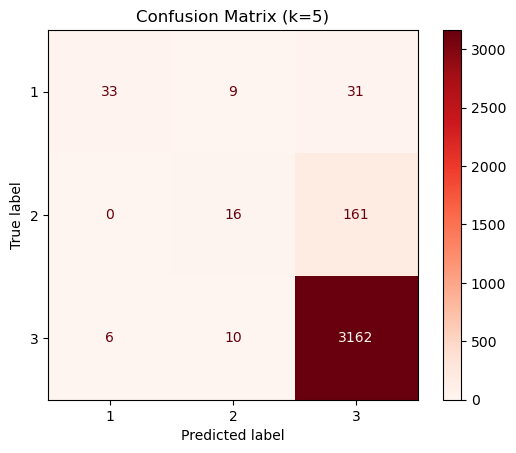

----------------------------
Accuracy: 93.67%


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Step 1: Train a k-NN model
k = 5  # You can adjust this value for better performance
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = knn_model.predict(X_test)

# Step 3: Evaluate Model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Step 4: Visualize the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap='Reds')
plt.title(f'Confusion Matrix (k={k})')
plt.show()

print('----------------------------')
print(f"Accuracy: {np.around(accuracy * 100, 2)}%")

### Q2

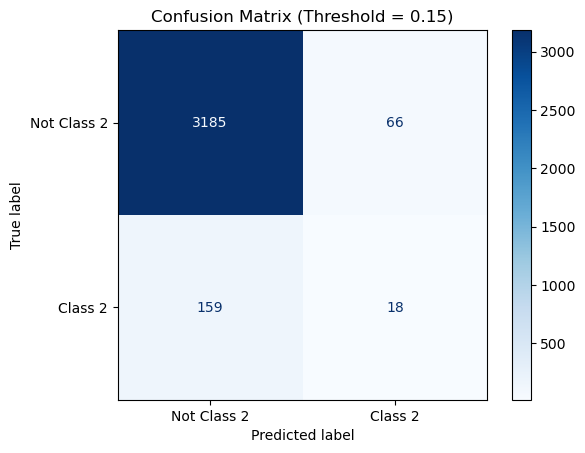

----------------------------
Threshold: 0.15
Accuracy: 93.44%


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Convert to binary classification problem
# We'll consider class "2" as positive (1), and others as negative (0)
train_data_binary = train_data.copy()
test_data_binary = test_data.copy()
train_data_binary.iloc[:, -1] = (train_data_binary.iloc[:, -1] == 2).astype(int)
test_data_binary.iloc[:, -1] = (test_data_binary.iloc[:, -1] == 2).astype(int)

# Step 2: Split into features and target
X_train, y_train = train_data_binary.iloc[:, :-1], train_data_binary.iloc[:, -1]
X_test, y_test = test_data_binary.iloc[:, :-1], test_data_binary.iloc[:, -1]

# Step 3: Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 4: Predict probabilities on the test set
y_proba = log_reg.predict_proba(X_test)[:, 1]  # probability of class 1 (positive)

# Step 5: Apply threshold and generate predictions
threshold = 0.15  # Vary this as needed
y_pred_thresh = (y_proba >= threshold).astype(int)

# Step 6: Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred_thresh)
accuracy = accuracy_score(y_test, y_pred_thresh)

# Step 7: Display results
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Class 2", "Class 2"])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

print('----------------------------')
print(f"Threshold: {threshold}")
print(f"Accuracy: {np.around(accuracy * 100, 2)}%")

### Q3

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('pokemonregr.csv')

# Drop rows with missing values (just in case)
data = data.dropna()

# Set 'speed' as the target and the rest as features
X = data.drop(columns=['speed'])
y = data['speed']

# Standardize features (important for regularized models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to train the model
def fit_linear(regularization=None, alpha=1.0):
    if regularization is None:
        model = LinearRegression()
    elif regularization == 'L2':
        model = Ridge(alpha=alpha)
    elif regularization == 'L1':
        model = Lasso(alpha=alpha)
    else:
        raise ValueError("Unsupported regularization type. Use None, 'L1', or 'L2'.")

    model.fit(X_train, y_train)
    return model

# Try different regularization techniques
reg = [None, 'L1', 'L2']
alpha = 1.0  # Regularization strength

for r in reg:
    model = fit_linear(regularization=r, alpha=alpha)
    print(f"Coefficients using {r or 'No'} Regularization:")
    print(model.coef_)
    print("------------------")


Coefficients using No Regularization:
[10.71866536 -8.07254566  2.31074674  8.92887599  3.9365583  -3.48208051]
------------------
Coefficients using L1 Regularization:
[ 9.03033179 -5.53807715  0.08796133  9.22634297  1.82117687 -0.73867954]
------------------
Coefficients using L2 Regularization:
[10.69096455 -8.04147374  2.30665953  8.92469176  3.92118433 -3.47039664]
------------------
